A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


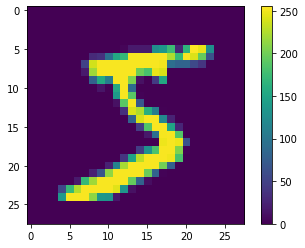

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Normalizando

In [6]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 1.0
x_train.min(): 0.0
x_test.max(): 1.0
x_test.min(): 0.0


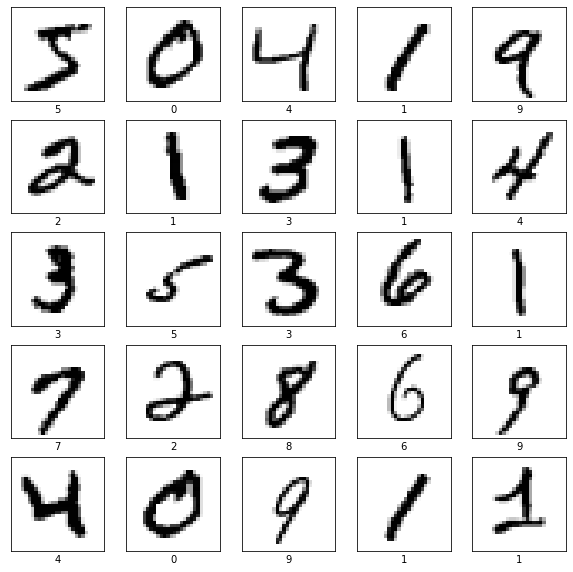

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [10]:
x_train[0].shape

(28, 28)

In [11]:
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28)


In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [106]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                43296     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [15]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3165 - accuracy: 0.9072
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1886 - accuracy: 0.9445
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1559 - accuracy: 0.9531
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1399 - accuracy: 0.9573
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1314 - accuracy: 0.9592
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1227 - accuracy: 0.9621
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1197 - accuracy: 0.9630
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1138 - accuracy: 0.9641
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1071 - accuracy: 0.9665
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1

In [22]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0810 - accuracy: 0.9747


---
# Modelo 2

In [17]:
model2 = models.Sequential()

model2.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                21648     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [18]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3798 - accuracy: 0.8857
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2039 - accuracy: 0.9384
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1662 - accuracy: 0.9499
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1513 - accuracy: 0.9538
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1390 - accuracy: 0.9567
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1346 - accuracy: 0.9582
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1272 - accuracy: 0.9599
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1193 - accuracy: 0.9631
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1166 - accuracy: 0.9636
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

## Evaluación de los modelos

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1)
print('x_test.shape:', x_test.shape)

x_test.shape: (10000, 28, 28, 1)


In [26]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0810 - accuracy: 0.9747


In [27]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0838 - accuracy: 0.9717


## Predicciones

In [28]:
predictions1 = model1.predict(x_test)

In [29]:
predictions2 = model2.predict(x_test)

In [30]:
predictions1[0]

array([1.7053983e-08, 7.7206579e-09, 5.5538558e-06, 1.3607000e-04,
       3.5828845e-10, 1.3106124e-07, 6.2175812e-13, 9.9984813e-01,
       1.2204025e-07, 9.8902574e-06], dtype=float32)

In [31]:
predictions2[0]

array([4.5321041e-08, 5.8360516e-09, 7.5820583e-07, 1.5273348e-05,
       6.0603067e-10, 1.8403373e-08, 3.2766075e-13, 9.9998283e-01,
       3.4639005e-08, 9.7947759e-07], dtype=float32)

In [32]:
y_test[0]

7

In [59]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Gráfica para modelo 1

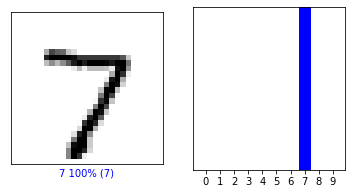

In [114]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  y_test)
plt.show()

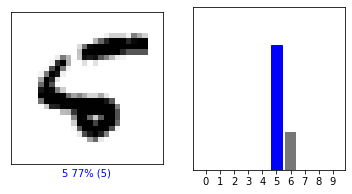

In [60]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  y_test)
plt.show()

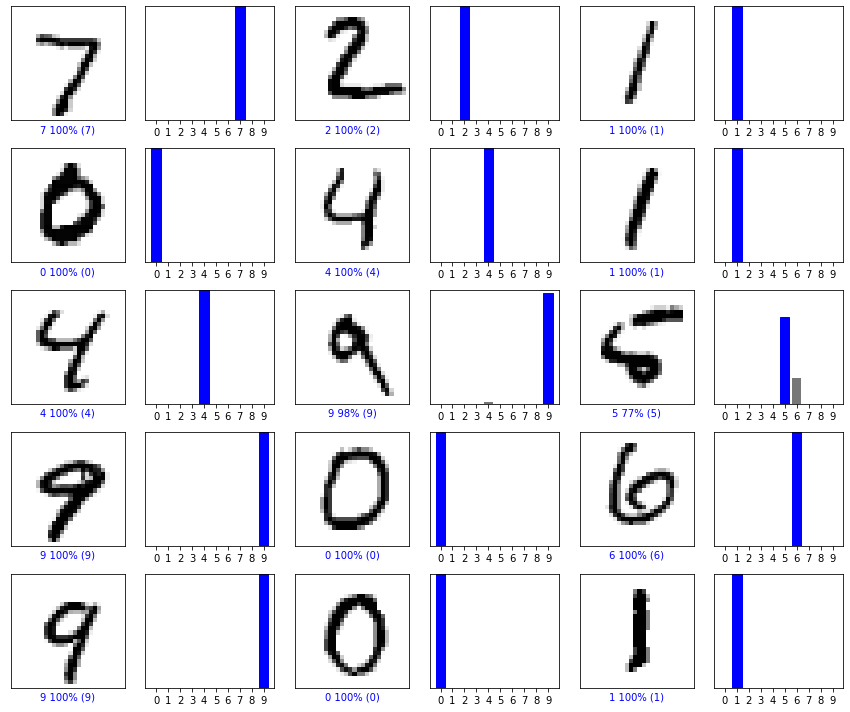

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions1[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions1[i], y_test)
plt.tight_layout()
plt.show()

## Gráfica para modelo 2

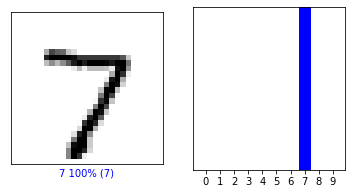

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  y_test)
plt.show()

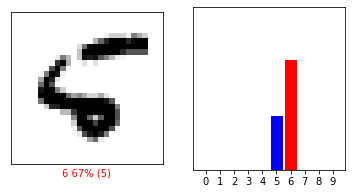

In [48]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  y_test)
plt.show()

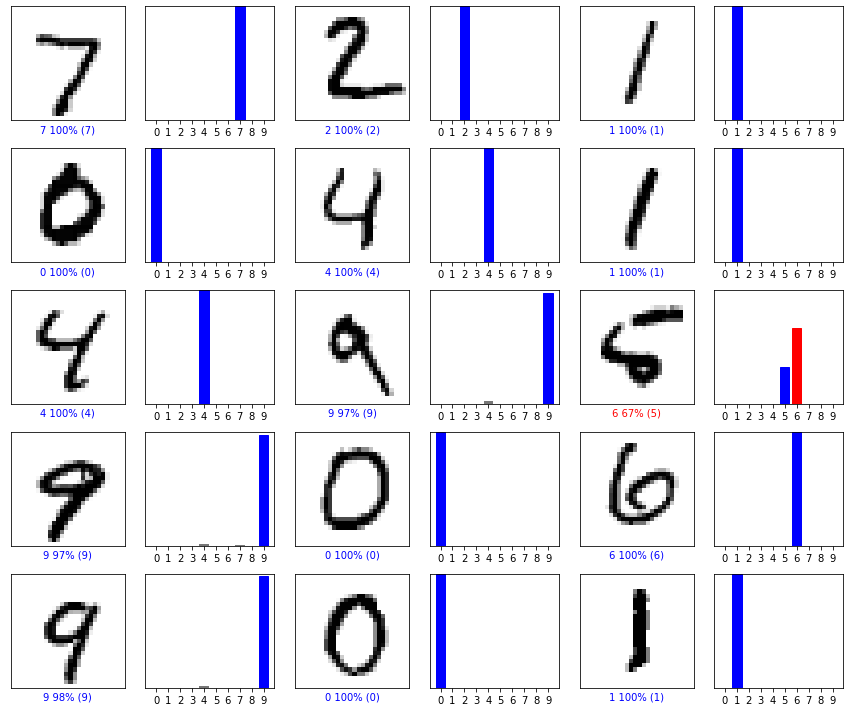

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], y_test)
plt.tight_layout()
plt.show()

In [62]:
print(PIL.__version__)

8.2.0


In [ ]:
Image.open

In [109]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('lalala/n02086079_186.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(224, 224)


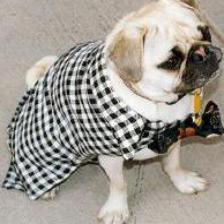

In [111]:
image

data.dtype uint8
data.shape (224, 224, 3)


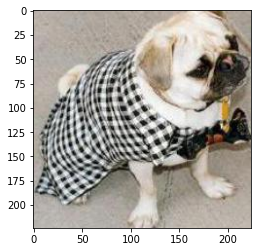

In [73]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('n02086079_186.jpg')
# summarize shape of the pixel array
print('data.dtype',data.dtype)
print('data.shape',data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [69]:
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('n02086079_186.jpg')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print('format',image2.format)
print('mode',image2.mode)
print('size',image2.size)

(224, 224, 3)
format None
mode RGB
size (224, 224)


In [72]:
data.shape

(224, 224, 3)

In [74]:
from os import listdir

In [79]:
imagenes_cargadas = []
for nombre_archivo in listdir('lalala'):
    perrito = image.imread('lalala/' + nombre_archivo)
    imagenes_cargadas.append(perrito)
    print('> loaded %s %s' % (nombre_archivo, perrito.shape))

> loaded n02086079_146.jpg (224, 224, 3)
> loaded n02086079_155.jpg (224, 224, 3)
> loaded n02086079_186.jpg (224, 224, 3)
> loaded n02086079_207.jpg (224, 224, 3)


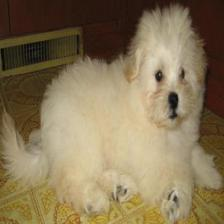

In [84]:

la1 = Image.fromarray(imagenes_cargadas[0])
la1

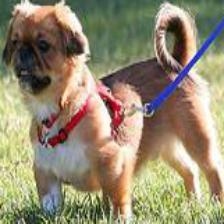

In [85]:

la2 = Image.fromarray(imagenes_cargadas[1])
la2

In [88]:
la2array = asarray(la2)
la2array.shape

(224, 224, 3)

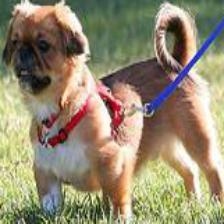

In [89]:
la2

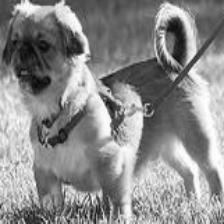

In [96]:
la2_gris = la2.convert(mode='L')
la2_gris

In [ ]:
la2 = Image.fromarray(imagenes_cargadas[1])
la2

In [97]:
la2_arraaaay = asarray(la2_gris)

In [99]:
la2_arraaaay.shape

(224, 224)

In [103]:
la2array.shape

(224, 224, 3)